In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [2]:
data = pd.read_csv("temp.csv")
data.head()

,Unnamed: 0,City_Name,Establishment_Type,Name,Rating,No_of_Reviews,Other_Ratings,Timings,Latitude,Longitude,...,Range_n_Cuisine,Address,Contact_No,Changed_Tag,Range_Cuisine_new,Cuisine,Cuisines,Meals,Special Diets,PRICE RANGE
0,3,Abbotsford,Restaurant,Townhall Public House Abbotsford,4.0,123,"{'Food': 3.5, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun', 'times': ['10:00 AM - 12:00 A...",49.047710,-122.291150,...,"['$$ - $$$', 'Bar', 'Gastropub', 'Canadian']","33720 South Fraser Way, Abbotsford, British Co...",+1 604-746-2000,All reviews brunch fish chips salad pub fo...,"Bar,Gastropub,Canadian","Gastropub, Bar, Canadian","Gastropub, Bar, Canadian,Bar,Gastropub,Canadian",None,NaN,NaN
1,8,Abbotsford,Restaurant,White Spot,4.0,80,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A...",NaN,49.037080,-122.225850,...,"['$$ - $$$', 'Canadian', 'Vegetarian Friendly'...","36063 North Parallel Rd, Abbotsford, British C...",+1 604-864-5744,All reviews eggs bacon burger fries salad ...,"Canadian,Vegetarian,Friendly,Gluten,Free,Options",Canadian,"Canadian,Canadian,Vegetarian,Friendly,Gluten,F...","Breakfast, Lunch, Dinner, Brunch","Breakfast, Lunch, Dinner, Brunch",None
2,12,Abbotsford,Restaurant,Common Place Cafe,4.5,18,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0}","[{'days': 'Mon - Sat', 'times': ['7:00 AM - 4:...",49.044353,-122.281450,...,"['₹', 'Canadian', 'Vegetarian Friendly', 'Vega...","33933 Gladys Ave MCC Centre, Abbotsford, Briti...",+1 604-851-7737,All reviews borscht fair trade cottage chee...,"Canadian,Vegetarian,Friendly,Vegan,Options",Canadian,"Canadian,Canadian,Vegetarian,Friendly,Vegan,Op...","Breakfast, Lunch, Brunch","Breakfast, Lunch, Brunch",None
3,15,Abbotsford,Restaurant,Ricardo's Pizza,4.5,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...","[{'days': 'Sun', 'times': ['11:00 AM - 10:00 P...",49.055172,-122.317184,...,"['$$ - $$$', 'Italian', 'Pizza', 'Canadian']","6-32750 George Ferguson Way, Abbotsford, Briti...",+1 604-859-1112,All reviews pizza pineapple ham salad bbq...,"Italian,Pizza,Canadian","Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner","Lunch, Dinner",None
4,18,Abbotsford,Restaurant,Keg Restaurant & Bar,4.0,199,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun - Sat', 'times': ['4:00 PM - 10...",49.041615,-122.277780,...,"['$$ - $$$', 'American', 'Steakhouse', 'Bar']","2142 West Railway St, Abbotsford, British Colu...",+1 604-855-9893,All reviews prime rib steak half lobster c...,"American,Steakhouse,Bar","Steakhouse, Bar, Canadian, American","Steakhouse, Bar, Canadian, American,American,S...","Dinner, After-hours","Dinner, After-hours",None


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14366 entries, 0 to 14365
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14366 non-null  int64  
 1   City_Name           14366 non-null  object 
 2   Establishment_Type  14366 non-null  object 
 3   Name                14365 non-null  object 
 4   Rating              14366 non-null  float64
 5   No_of_Reviews       14366 non-null  object 
 6   Other_Ratings       14366 non-null  object 
 7   Timings             11505 non-null  object 
 8   Latitude            14366 non-null  float64
 9   Longitude           14366 non-null  float64
 10  Tags                14366 non-null  object 
 11  Details             14366 non-null  object 
 12  Rank                14365 non-null  object 
 13  Range_n_Cuisine     14366 non-null  object 
 14  Address             14366 non-null  object 
 15  Contact_No          14366 non-null  object 
 16  Chan

In [15]:
data['Cuisines'] = data['Cuisines'].fillna(" ")

In [16]:
import re

In [17]:
def remove_punc(text):
    text = text.replace(',', ' ')
    return text

In [18]:
data['Cuisines'] = data['Cuisines'].apply(lambda x : remove_punc(x))

In [19]:
x = data['Cuisines']
x

0          Gastropub  Bar  Canadian Bar Gastropub Canadian
1        Canadian Canadian Vegetarian Friendly Gluten F...
2        Canadian Canadian Vegetarian Friendly Vegan Op...
3          Italian  Pizza  Canadian Italian Pizza Canadian
4        Steakhouse  Bar  Canadian  American American S...
                               ...                        
14361                         Cafe  Canadian Cafe Canadian
14362                 German Speciality Food Market German
14363    Mexican  Canadian Mexican Canadian Vegetarian ...
14364     Canadian  Cafe Cafe Canadian Vegetarian Friendly
14365                                    American American
Name: Cuisines, Length: 14366, dtype: object

In [20]:
data.head()

,Unnamed: 0,City_Name,Establishment_Type,Name,Rating,No_of_Reviews,Other_Ratings,Timings,Latitude,Longitude,...,Range_n_Cuisine,Address,Contact_No,Changed_Tag,Range_Cuisine_new,Cuisine,Cuisines,Meals,Special Diets,PRICE RANGE
0,3,Abbotsford,Restaurant,Townhall Public House Abbotsford,4.0,123,"{'Food': 3.5, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun', 'times': ['10:00 AM - 12:00 A...",49.047710,-122.291150,...,"['$$ - $$$', 'Bar', 'Gastropub', 'Canadian']","33720 South Fraser Way, Abbotsford, British Co...",+1 604-746-2000,All reviews brunch fish chips salad pub fo...,Bar Gastropub Canadian,"Gastropub, Bar, Canadian",Gastropub Bar Canadian Bar Gastropub Canadian,None,NaN,NaN
1,8,Abbotsford,Restaurant,White Spot,4.0,80,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A...",NaN,49.037080,-122.225850,...,"['$$ - $$$', 'Canadian', 'Vegetarian Friendly'...","36063 North Parallel Rd, Abbotsford, British C...",+1 604-864-5744,All reviews eggs bacon burger fries salad ...,Canadian Vegetarian Friendly Gluten Free Options,Canadian,Canadian Canadian Vegetarian Friendly Gluten F...,"Breakfast, Lunch, Dinner, Brunch","Breakfast, Lunch, Dinner, Brunch",None
2,12,Abbotsford,Restaurant,Common Place Cafe,4.5,18,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0}","[{'days': 'Mon - Sat', 'times': ['7:00 AM - 4:...",49.044353,-122.281450,...,"['₹', 'Canadian', 'Vegetarian Friendly', 'Vega...","33933 Gladys Ave MCC Centre, Abbotsford, Briti...",+1 604-851-7737,All reviews borscht fair trade cottage chee...,Canadian Vegetarian Friendly Vegan Options,Canadian,Canadian Canadian Vegetarian Friendly Vegan Op...,"Breakfast, Lunch, Brunch","Breakfast, Lunch, Brunch",None
3,15,Abbotsford,Restaurant,Ricardo's Pizza,4.5,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...","[{'days': 'Sun', 'times': ['11:00 AM - 10:00 P...",49.055172,-122.317184,...,"['$$ - $$$', 'Italian', 'Pizza', 'Canadian']","6-32750 George Ferguson Way, Abbotsford, Briti...",+1 604-859-1112,All reviews pizza pineapple ham salad bbq...,Italian Pizza Canadian,"Italian, Pizza, Canadian",Italian Pizza Canadian Italian Pizza Canadian,"Lunch, Dinner","Lunch, Dinner",None
4,18,Abbotsford,Restaurant,Keg Restaurant & Bar,4.0,199,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun - Sat', 'times': ['4:00 PM - 10...",49.041615,-122.277780,...,"['$$ - $$$', 'American', 'Steakhouse', 'Bar']","2142 West Railway St, Abbotsford, British Colu...",+1 604-855-9893,All reviews prime rib steak half lobster c...,American Steakhouse Bar,"Steakhouse, Bar, Canadian, American",Steakhouse Bar Canadian American American S...,"Dinner, After-hours","Dinner, After-hours",None


In [21]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [23]:
tfv_matrix = tfv.fit_transform(data['Cuisines'])  

In [34]:
df = pd.DataFrame(tfv_matrix[0].T.todense(), index=tfv.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

                                      TF-IDF
gastropub                           0.444937
gastropub bar canadian              0.385357
canadian bar gastropub              0.370891
bar gastropub canadian              0.335350
bar gastropub                       0.299308
gastropub canadian                  0.280729
gastropub bar                       0.258767
bar                                 0.227527
bar canadian bar                    0.222469
bar canadian                        0.157912
canadian bar                        0.156463
canadian                            0.132207
italian mediterranean greek         0.000000
italian mediterranean european      0.000000
italian mediterranean italian       0.000000
italian mediterranean neapolitan    0.000000
italian mediterranean vegetarian    0.000000
italian mediterranean wine          0.000000
italian mediterranean contemporary  0.000000
italian mexican                     0.000000
italian mexican quick               0.000000
italian pi

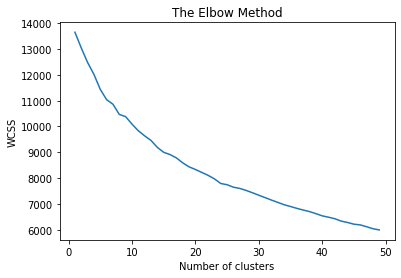

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(tfv_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,50),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
kmeans = KMeans(n_clusters=50,init='k-means++',random_state=0)
kmeans.fit(tfv_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [97]:
data['clusters'] = kmeans.labels_
data.head()

,Unnamed: 0,City_Name,Establishment_Type,Name,Rating,No_of_Reviews,Other_Ratings,Timings,Latitude,Longitude,...,Address,Contact_No,Changed_Tag,Range_Cuisine_new,Cuisine,Cuisines,Meals,Special Diets,PRICE RANGE,clusters
0,3,Abbotsford,Restaurant,Townhall Public House Abbotsford,4.0,123,"{'Food': 3.5, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun', 'times': ['10:00 AM - 12:00 A...",49.047710,-122.291150,...,"33720 South Fraser Way, Abbotsford, British Co...",+1 604-746-2000,All reviews brunch fish chips salad pub fo...,Bar Gastropub Canadian,"Gastropub, Bar, Canadian","Gastropub, Bar, Canadian,Bar,Gastropub,Canadian",None,NaN,NaN,49
1,8,Abbotsford,Restaurant,White Spot,4.0,80,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A...",NaN,49.037080,-122.225850,...,"36063 North Parallel Rd, Abbotsford, British C...",+1 604-864-5744,All reviews eggs bacon burger fries salad ...,Canadian Vegetarian Friendly Gluten Free Options,Canadian,"Canadian,Canadian,Vegetarian,Friendly,Gluten,F...","Breakfast, Lunch, Dinner, Brunch","Breakfast, Lunch, Dinner, Brunch",None,10
2,12,Abbotsford,Restaurant,Common Place Cafe,4.5,18,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0}","[{'days': 'Mon - Sat', 'times': ['7:00 AM - 4:...",49.044353,-122.281450,...,"33933 Gladys Ave MCC Centre, Abbotsford, Briti...",+1 604-851-7737,All reviews borscht fair trade cottage chee...,Canadian Vegetarian Friendly Vegan Options,Canadian,"Canadian,Canadian,Vegetarian,Friendly,Vegan,Op...","Breakfast, Lunch, Brunch","Breakfast, Lunch, Brunch",None,6
3,15,Abbotsford,Restaurant,Ricardo's Pizza,4.5,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...","[{'days': 'Sun', 'times': ['11:00 AM - 10:00 P...",49.055172,-122.317184,...,"6-32750 George Ferguson Way, Abbotsford, Briti...",+1 604-859-1112,All reviews pizza pineapple ham salad bbq...,Italian Pizza Canadian,"Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner","Lunch, Dinner",None,17
4,18,Abbotsford,Restaurant,Keg Restaurant & Bar,4.0,199,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun - Sat', 'times': ['4:00 PM - 10...",49.041615,-122.277780,...,"2142 West Railway St, Abbotsford, British Colu...",+1 604-855-9893,All reviews prime rib steak half lobster c...,American Steakhouse Bar,"Steakhouse, Bar, Canadian, American","Steakhouse, Bar, Canadian, American,American,S...","Dinner, After-hours","Dinner, After-hours",None,34


In [107]:
def cluster_predict(str_input):
    Y = tfv.transform(str_input)
    prediction = kmeans.predict(Y)
    return prediction

In [113]:
f = 'Italian Pizza'
prediction = cluster_predict([f])

In [114]:
prediction

array([17])

In [116]:
italian =  data[data['clusters'] == 17]
italian.head(20)

,Unnamed: 0,City_Name,Establishment_Type,Name,Rating,No_of_Reviews,Other_Ratings,Timings,Latitude,Longitude,...,Address,Contact_No,Changed_Tag,Range_Cuisine_new,Cuisine,Cuisines,Meals,Special Diets,PRICE RANGE,clusters
3,15,Abbotsford,Restaurant,Ricardo's Pizza,4.5,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...","[{'days': 'Sun', 'times': ['11:00 AM - 10:00 P...",49.055172,-122.317184,...,"6-32750 George Ferguson Way, Abbotsford, Briti...",+1 604-859-1112,All reviews pizza pineapple ham salad bbq...,Italian Pizza Canadian,"Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner","Lunch, Dinner",None,17
32,178,Abbotsford,Restaurant,Famoso Neapolitan Pizzeria,4.0,101,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun - Thu', 'times': ['11:00 AM - 1...",49.057945,-122.378400,...,"3122 Mount Lehman Road, Abbotsford, British Co...",+1 604-381-1881,All reviews pizza tomato bisque thin crust ...,Italian Pizza Canadian,"Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner",None,"Lunch, Dinner",17
37,191,Abbotsford,Restaurant,Ocean Park Pizza & Steak House Abbotsford,4.5,138,"{'Food': 4.0, 'Service': 4.5, 'Value': 4.0, 'A...","[{'days': 'Sun - Sat', 'times': ['4:00 PM - 10...",49.049010,-122.259880,...,"102-2596 McMillan Rd, Abbotsford, British Colu...",+1 604-859-2924,All reviews pizza veal schnitzel prime rib ...,Italian Pizza Greek,"Italian, Pizza, Greek","Italian, Pizza, Greek,Italian,Pizza,Greek","Dinner, Drinks","Dinner, Drinks",None,17
87,385,Aldergrove,Restaurant,Famoso Neapolitan Pizzeria,4.0,101,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun - Thu', 'times': ['11:00 AM - 1...",49.057945,-122.378400,...,"3122 Mount Lehman Road, Abbotsford, British Co...",+1 604-381-1881,All reviews pizza tomato bisque thin crust ...,Italian Pizza Canadian,"Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner",None,"Lunch, Dinner",17
91,395,Aldergrove,Restaurant,Ricardo's Pizza,4.5,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...","[{'days': 'Sun', 'times': ['11:00 AM - 10:00 P...",49.055172,-122.317184,...,"6-32750 George Ferguson Way, Abbotsford, Briti...",+1 604-859-1112,All reviews pizza pineapple ham salad bbq...,Italian Pizza Canadian,"Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner","Lunch, Dinner",None,17
134,533,Ainsworth_Hot_Springs,Restaurant,"Boccalino Restaurant, Motel & Cabins",4.5,44,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A...","[{'days': 'Sun - Wed', 'times': ['12:00 PM - 7...",49.678030,-116.871254,...,"16818 Highway 3A, Kootenay Bay, British Columb...",+1 250-227-6906,All reviews pizza salad great food ferry t...,Italian Pizza International,"Italian, Pizza, International, European, Wine Bar","Italian, Pizza, International, European, Wine ...","Dinner, Lunch",None,None,17
164,581,Agassiz,Restaurant,Village Pizzeria,4.5,450,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.5, 'A...","[{'days': 'Mon', 'times': ['4:00 PM - 9:00 PM'...",49.302467,-121.783630,...,"101-160 Lillooet Avenue, Harrison Hot Springs,...",+1 604-796-1170,All reviews pizza spinach salad pie wings ...,Italian Pizza Canadian,"Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner, After-hours","Lunch, Dinner, After-hours","Lunch, Dinner, After-hours",17
346,987,Burnaby,Quick Bites,Straight Outta Brooklyn Pizzeria,4.5,115,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.5}",NaN,49.279102,-123.116630,...,"350 Robson St, Vancouver, British Columbia V6B...",+1 604-559-3500,All reviews pepperoni pie new york style pi...,Quick Bites Italian Pizza,"Italian, Pizza, Fast food, Canadian","Italian, Pizza, Fast food, Canadian,Quick,Bite...","Lunch, Dinner","Lunch, Dinner",None,17
505,1346,Britannia_Beach,Restaurant,Joe Pesto's Wood Fire Pizza,4.5,28,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0}",NaN,49.701410,-123.153170,...,"38165 2nd Ave, Squa